<a href="https://colab.research.google.com/github/spalominor/SS202501/blob/main/SS_Taller04_070525.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solución del problema
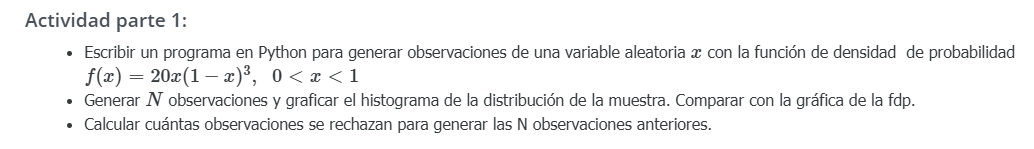



Para 100000 observaciones, se rechazaron 110738 muestras.
Rechazos: 110738 - 110.738%


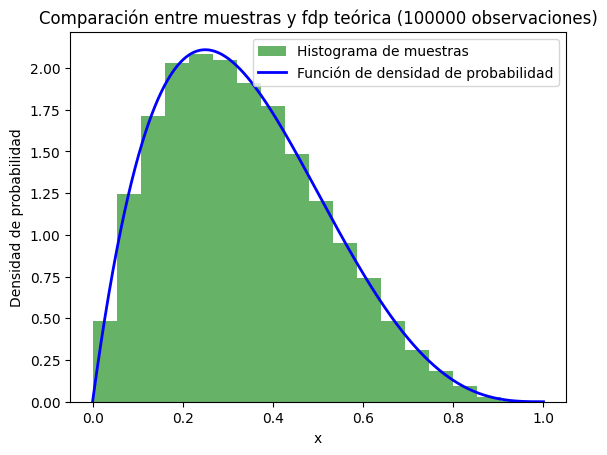

In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt



def f(x):
    return 20 * x * (1 - x)**3


def fx_norm(x):
    return f(x) / encontrar_maximo()


def encontrar_maximo():
    """
    Encuentra el valor máximo de f(x) = 20x(1 - x)^3 en el intervalo [0, 1].

    Returns:
        float: El valor máximo de f(x) en el intervalo.
    """
    # La función tiene un máximo en el punto x = 1/4
    # f'(x) = 0 en x = 1/4
    x_max = 1 / 4
    max_f = f(x_max)

    return max_f


def prueba_rechazo(f, a, b, max_f, n_obs):
    """
    Genera observaciones mediante prueba de rechazo.

    Args:
        f (function): Función f(x).
        a (float): Límite inferior del intervalo.
        b (float): Límite superior del intervalo.
        max_f (float): Valor máximo de f(x) en [a, b].
        n_obs (int): Número de observaciones deseadas.

    Returns:
        list: Lista de observaciones aceptadas.
        int: Número de rechazos ocurridos.
    """
    # Inicializamos la lista de observaciones aceptadas
    muestras = []

    # Inicializamos contador de rechazos
    rechazos = 0

    # Continuamos hasta generar n_obs observaciones
    while len(muestras) < n_obs:
        # Generamos una muestra uniforme entre 0 y 1
        r1 = random.uniform(0, 1)

        # Trasladar r1 para obtener el valor de x
        x = a + (b - a) * r1

        # Generamos un número uniforme u ∈ [0, 1]
        u = random.uniform(0, 1)

        # Aceptamos si u ≤ f(x)/max_f
        if u <= fx_norm(x):
            # Agregamos el valor aceptado
            muestras.append(x)
        else:
            # Contamos el rechazo
            rechazos += 1

    return muestras, rechazos


def graficar_resultado(muestras, f, a, b, n):
    """
    Graficar el histograma de las muestras generadas y la fdp teórica.

    Args:
        muestras (list): Lista de observaciones generadas.
        f (function): Función f(x).
        a (float): Límite inferior del intervalo.
        b (float): Límite superior del intervalo.
        n_obs (int): Número de observaciones generadas.

    Returns:
        None
    """
    # Definir el número de barras con la regla de Struges
    num_bins = int(np.ceil(np.log2(n)) + 1)

    # Crear el histograma de las muestras generadas
    plt.hist(muestras, bins=num_bins, density=True,
             alpha=0.6, color='g', label='Histograma de muestras')

    # Crear valores para la fdp teórica
    x_vals = np.linspace(a, b, 1000)
    y_vals = [f(x) for x in x_vals]

    # Graficar la fdp teórica
    plt.plot(x_vals, y_vals, label='Función de densidad de probabilidad',
             color='b', lw=2)

    # Títulos y etiquetas
    plt.title(f'Comparación entre muestras y fdp teórica ({n} observaciones)')
    plt.xlabel('x')
    plt.ylabel('Densidad de probabilidad')
    plt.legend()

    # Mostrar la gráfica
    plt.show()

# Función principal
def actividad1():
    """
    Función principal que coordina todo el proceso de generación de muestras
    necesarias para dar la solución a la actividad 1

    Realiza los siguientes pasos:
    1. Define la función f(x).
    2. Encuentra el valor máximo de f(x) en el intervalo [0, 1].
    3. Genera N observaciones con el método de prueba de rechazo.
    4. Grafica el histograma de las muestras y la fdp teórica.
    5. Muestra el número de rechazos.

    Returns:
        None
    """
    # Definir el intervalo [0, 1]
    a, b = 0, 1

    # Encontramos el valor máximo de f(x) en el intervalo [0, 1]
    max_f = encontrar_maximo()

    # Generamos N observaciones
    N = 100000
    muestras, rechazos = prueba_rechazo(f, a, b, max_f, N)

    # Mostramos el número de rechazos
    print(f"Para {N} observaciones, se rechazaron {rechazos} muestras.")
    print(f"Rechazos: {rechazos} - {rechazos*100/N}%")

    # Graficamos el histograma de las muestras y la fdp teórica
    graficar_resultado(muestras, f, a, b, N)


# Ejecutar el programa principal para la actividad 1
actividad1()

# Solución del problema 2

Estimación: 0.50320
Intervalo de confianza (95%): (0.5001010313618625, 0.5062989686381375)
Valor real (Wolfram Alpha): 0.5
Error relativo: 0.64%


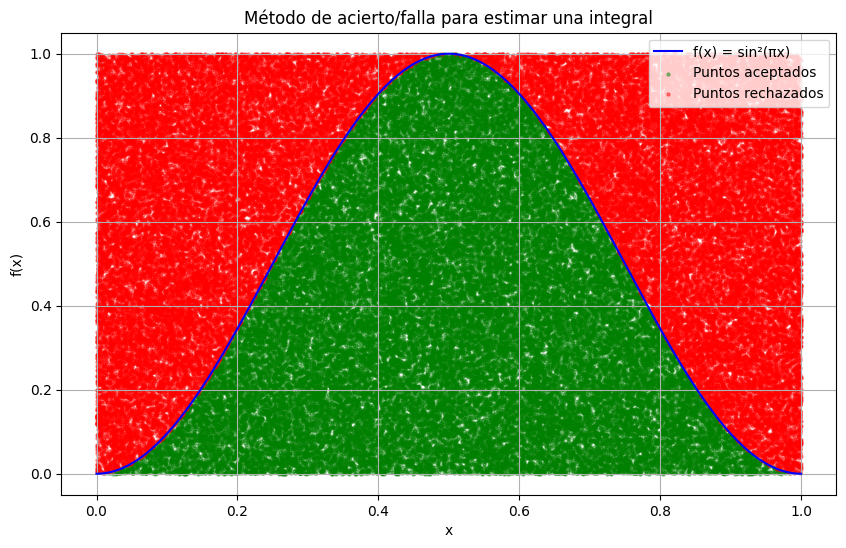

In [ ]:
# Función f(x) = sin^2(πx)
def g(x):
    return math.sin(math.pi * x) ** 2


def gx_norm(x):
    return g(x) / 1


# Estimación de la integral usando el método de acierto/falla
def estimar_integral(a, b, c, N):
    """
    Estima la integral de f(x) en el intervalo [a, b] utilizando el método de
    acierto/falla

    Args:
        a (float): Límite inferior del intervalo.
        b (float): Límite superior del intervalo.
        c (float): Valor máximo de la función.
        N (int): Número de intentos aleatorios.

    Returns:
        float: Estimación de la integral.
    """
    # Inicializar la lista de puntos aceptados
    puntos_aceptados = []
    puntos_rechazados = []

    # Inicializar el contador de aciertos
    aciertos = 0

    for _ in range(N):
        # Generamos una muestra uniforme entre 0 y 1
        r1 = random.uniform(0, 1)

        # Trasladar r1 para obtener el valor de x
        x = a + (b - a) * r1

        # Generamos un número uniforme u ∈ [0, 1]
        u = random.uniform(0, 1)

        # Aceptamos si u ≤ f(x)/max_f
        if u <= gx_norm(x):
            # Agregamos el valor aceptado
            aciertos += 1
            puntos_aceptados.append((x, u))
        else:
            # Contamos el rechazo
            puntos_rechazados.append((x, u))

    # Estimación de la integral
    I_estimado = c * (b - a) * (aciertos / N)

    return I_estimado, puntos_aceptados, puntos_rechazados


def calcular_intervalo_confianza(aciertos, N, z=1.96):
    """
    Calcula el intervalo de confianza para la estimación de la integral dado
    un cuantil z de la distribución normal estándar.

    Args:
        I_estimado (float): Estimación de la integral

    Returns:
        tuple: Intervalo de confianza (inferior, superior)
    """
    # Calcular la desviación estándar muestral
    media = aciertos / N
    desviacion_estandar = math.sqrt(media * (1 - media) / N)

    # Calcular el margen de error
    margen_error = z * desviacion_estandar

    # Calcular el intervalo de confianza
    intervalo_inferior = media - margen_error
    intervalo_superior = media + margen_error

    return intervalo_inferior, intervalo_superior


def graficar_resultado(puntos_aceptados, puntos_rechazados, a, b):
    """Grafica los puntos aceptados y la función f(x)

    Args:
        puntos_aceptados (list): Lista de tuplas (x, y) aceptadas
        a (float): Límite inferior del intervalo
        b (float): Límite superior del intervalo
    """
    # Separar los puntos aceptados en listas de x e y
    x_pts, y_pts = zip(*puntos_aceptados)

    # Crear lista de valores x para f(x)
    x_vals = [i / 1000 for i in range(1001)]
    y_vals = [g(x) for x in x_vals]

    # Configurar gráfico
    plt.figure(figsize=(10, 6))

    # Dibujar la función
    plt.plot(x_vals, y_vals, label='f(x) = sin²(πx)', color='blue')

    # Dibujar los puntos aceptados
    plt.scatter(x_pts, y_pts, s=5, color='green', alpha=0.4,
                label='Puntos aceptados')
    plt.scatter(*zip(*puntos_rechazados), s=5, color='red', alpha=0.4,
                label='Puntos rechazados')

    # Etiquetas y leyenda
    plt.title('Método de acierto/falla para estimar una integral')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()


def actividad2():
    """
    Función principal para estimar la integral de sin^2(πx) en el intervalo
    [0, 1] usando el método de acierto/falla.

    Returns:
        None
    """
    a = 0  # Límite inferior
    b = 1  # Límite superior
    c = 1 # Valor máximo de la función
    N = 100000  # Número de intentos (Cien mil)

    # Estimación de la integral
    I_estimado, puntos_aceptados, puntos_rechazados = estimar_integral(a, b,
                                                                       c, N)

    # Contar el número de aciertos
    aciertos = len(puntos_aceptados)

    # Calcular el intervalo de confianza
    intervalo = calcular_intervalo_confianza(aciertos=aciertos, N=N)

    # Valor exacto según Wolfram Alpha
    valor_real = 0.5

    # Mostrar resultados
    print(f"Estimación: {I_estimado:.5f}")
    print(f"Intervalo de confianza (95%): {intervalo}")
    print(f"Valor real (Wolfram Alpha): {valor_real}")
    print(f"Error relativo: {abs(I_estimado - valor_real) / valor_real:.2%}")

    # Graficar resultados
    graficar_resultado(puntos_aceptados, puntos_rechazados, a, b)

actividad2()